In [1]:
import pandas as pd
import warnings
import numpy as np
from matplotlib import pyplot as plt
warnings.filterwarnings("ignore")

from dataloader import getVAE_DataLoader, IVSDataForVAE, getLSTM_Dataloader
from models import PredictiveEngine, LSTM, ArbFreeDNN, ConvVAE, getModels, graphIVS, eval_LSTM

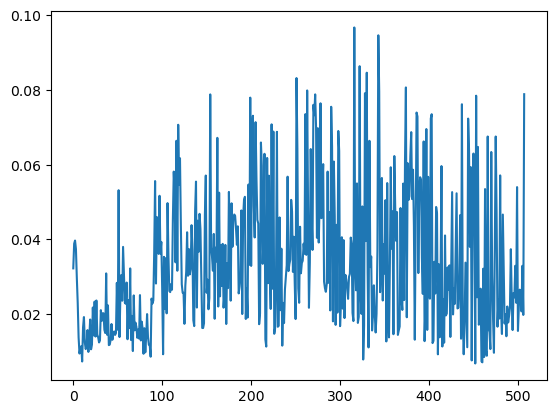

RMSE: 0.033866129221923176
Overall MDA: 0.6601971757662521 | ATM MDA: 0.7189413823272088
MAPE: 0.12950676450856097
CAL Score: 0.0 | BUT Score: 0.0


In [2]:
VAE, LSTM, DNN = getModels('7164519', '5030929', '3951028')
engine = PredictiveEngine(trained_LSTM=LSTM, trained_DNN=DNN, use_VAE=False, trained_VAE=VAE)
preds, targets, mse_chart, rmse_chart, mda_chart, mape_chart, cal_chart, but_chart = engine.validate(section='test')

plt.plot(rmse_chart)
plt.show()

print(f'RMSE: {sum(rmse_chart) / len(rmse_chart)}')

atm_mda = 0.0
overall_mda = 0.0
for time in mda_chart:
    atm_mda += (sum(time[4:7]) + sum(time[15:18]) + sum(time[26:29])) / 9
    overall_mda += sum(time) / len(time)
overall_mda = overall_mda / len(mda_chart)
atm_mda = atm_mda / len(mda_chart)
print(f'Overall MDA: {overall_mda} | ATM MDA: {atm_mda}')

mape_total = 0.0
for idx in mape_chart:
    mape_total += sum(idx) / len(idx)
print(f'MAPE: {mape_total / len(mape_chart)}')

print(f'CAL Score: {sum(cal_chart) / len(cal_chart)} | BUT Score: {sum(but_chart) / len(but_chart)}')

In [16]:
models = [
    '4292666',  # 16 headed SAM
    '4409094',  # 1 headed SAM
    '9465189',  # 0 headed SAM
    '8907201'   # 1 headed VAE
    ]

results_rmse = []
results_mape = []
results_mda = []

for model in models:
    VAE, LSTM, DNN = getModels('3944192', model, '3951028')
    if model == '8907201':
        engine = PredictiveEngine(trained_LSTM=LSTM, trained_DNN=DNN, use_VAE=True, trained_VAE=VAE)
    else:
        engine = PredictiveEngine(trained_LSTM=LSTM, trained_DNN=DNN, use_VAE=False, trained_VAE=VAE)
    preds, targets, mse_chart, rmse_chart_valid, mda_chart_valid, mape_chart_valid, cal_chart, but_chart = engine.validate(section='valid')
    preds, targets, mse_chart, rmse_chart_test, mda_chart_test, mape_chart_test, cal_chart, but_chart = engine.validate(section='test')

    results_rmse.append(rmse_chart_valid + rmse_chart_test)
    results_mape.append(mape_chart_valid + mape_chart_valid)
    results_mda.append(mda_chart_valid + mda_chart_test)

In [48]:
len(results_rmse[0])

1020

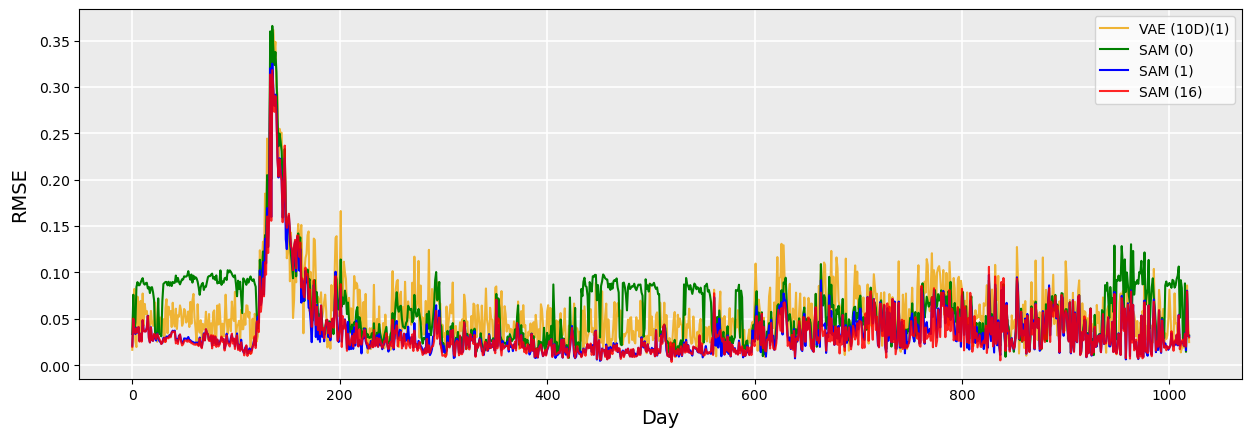

In [129]:
plt.figure().set_figwidth(15)
ax = plt.axes()
ax.set_facecolor('#EBEBEB')
plt.grid(which='major', color='white', linewidth=1.2)
plt.xlabel('Day', size=14)
plt.ylabel('RMSE', size=14, labelpad=7)
plt.plot(results_rmse[3], color='#EFB435', label='VAE (10D)(1)')
plt.plot(results_rmse[2], color='g', label='SAM (0)')
plt.plot(results_rmse[1], color='b', label='SAM (1)')
plt.plot(results_rmse[0], color='r', label='SAM (16)', alpha=0.85)
plt.legend(fontsize=11.5)
plt.show()

In [49]:
real_results_mape = []
for model in results_mape:
    cur = []
    for time in model:
        cur.append(sum(time) / len(time))
    real_results_mape.append(cur)

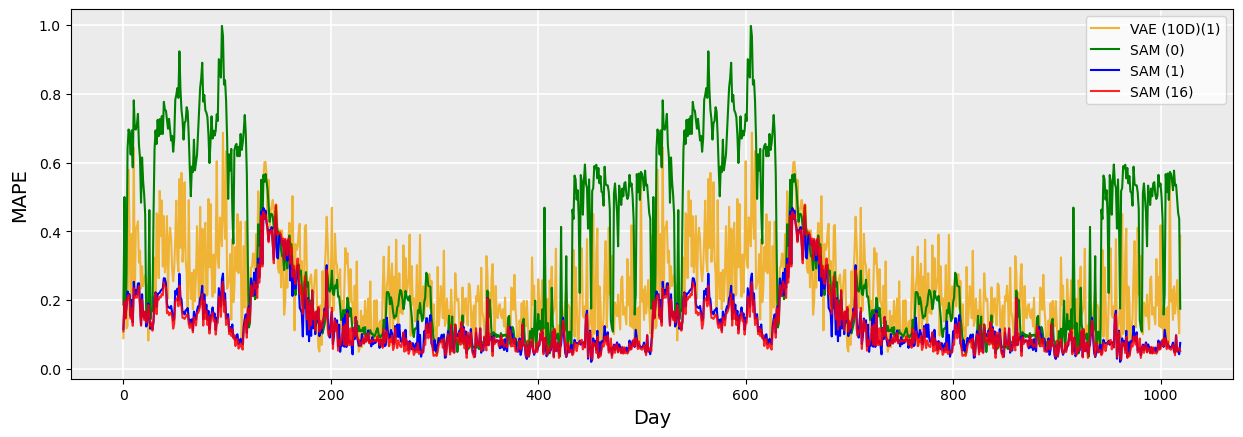

In [128]:
plt.figure().set_figwidth(15)
ax = plt.axes()
ax.set_facecolor('#EBEBEB')
plt.grid(which='major', color='white', linewidth=1.2)
plt.xlabel('Day', size=14)
plt.ylabel('MAPE', size=14, labelpad=7)
plt.plot(real_results_mape[3], color='#EFB435', label='VAE (10D)(1)')
plt.plot(real_results_mape[2], color='g', label='SAM (0)')
plt.plot(real_results_mape[1], color='b', label='SAM (1)')
plt.plot(real_results_mape[0], color='r', label='SAM (16)', alpha=0.85)
plt.legend(fontsize=11.5)
plt.show()

In [70]:
real_results_mda = []
for model in results_mda:
    cur = []
    for time in model:
        cur.append(sum(time) / len(time))
    real_results_mda.append(cur)

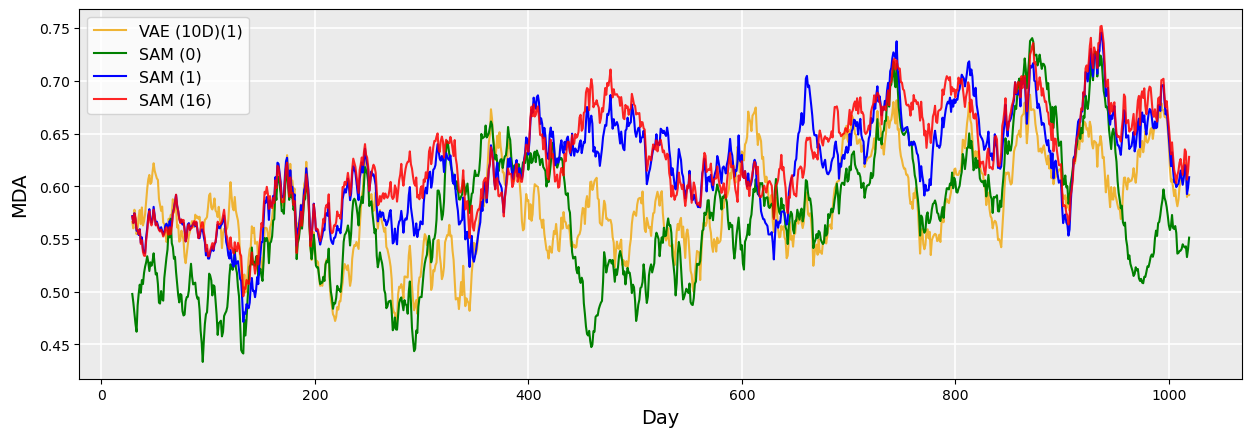

In [133]:
plt.figure().set_figwidth(15)
ax = plt.axes()
ax.set_facecolor('#EBEBEB')
plt.grid(which='major', color='white', linewidth=1.2)
plt.xlabel('Day', size=14)
plt.ylabel('MDA', size=14, labelpad=7)
plt.plot(pd.DataFrame(real_results_mda[3]).rolling(30).mean(), color='#EFB435', label='VAE (10D)(1)')
plt.plot(pd.DataFrame(real_results_mda[2]).rolling(30).mean(), color='g', label='SAM (0)')
plt.plot(pd.DataFrame(real_results_mda[1]).rolling(30).mean(), color='b', label='SAM (1)')
plt.plot(pd.DataFrame(real_results_mda[0]).rolling(30).mean(), color='r', label='SAM (16)', alpha=0.85)
plt.legend(fontsize=11.5)
plt.show()

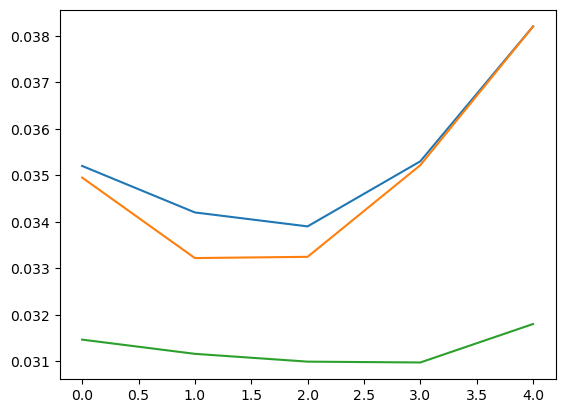

In [32]:
rmse = [0.0352, 0.0342, 0.0339, 0.0353, 0.0382]
mape = [.1312, .1247, .1248, .1322, .1434]
mda = [.6427, .6478, .6506, .6509, .6371]

for i in range(5):
    total_rmape_f = rmse[i] / mape[i]
    total_rmda_f = rmse[i] / mda[i]

final_rmape_f = total_rmape_f / 5
final_rmda_f = total_rmda_f / 5

plt.plot([(x) for x in rmse])
plt.plot([(x * total_rmape_f) for x in mape])
plt.plot([-(x * total_rmda_f) + 0.07 for x in mda])
plt.show()


In [79]:
rmse = [0.0352, 0.0342, 0.0339, 0.0353, 0.0382]
mape = [.1312, .1247, .1248, .1322, .1434]
mda = [.6427, .6478, .6506, .6509, .6371]

rmse2 = [0.0528, 0.0536, 0.0540, 0.0534, 0.0534]
mape2 = [0.2082, 0.2107, 0.2111, 0.2104, 0.2100]
mda2 = [0.5960, 0.5939, 0.5955, 0.5941, 0.5944]

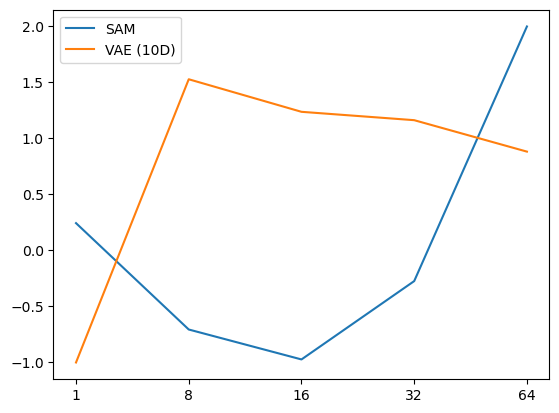

In [84]:
composite = [0] * 5
composite2 = [0] * 5
for i in range(5):
    rmse_part = ((rmse[i] - min(rmse)) / (max(rmse) - min(rmse)))
    mape_part = ((mape[i] - min(mape)) / (max(mape) - min(mape)))
    mda_part = ((mda[i] - min(mda)) / (max(mda) - min(mda)))

    rmse_part2 = ((rmse2[i] - min(rmse2)) / (max(rmse2) - min(rmse2)))
    mape_part2 = ((mape2[i] - min(mape2)) / (max(mape2) - min(mape2)))
    mda_part2 = ((mda2[i] - min(mda2)) / (max(mda2) - min(mda2)))

    composite[i] = rmse_part + mape_part - mda_part
    composite2[i] = rmse_part2 + mape_part2 - mda_part2

x = ['1', '8', '16', '32', '64']
plt.plot(x, composite, label='SAM')
plt.plot(x, composite2, label='VAE (10D)')
plt.legend()
plt.show()

In [51]:
add_factor

0.07269926475740222

Target: 


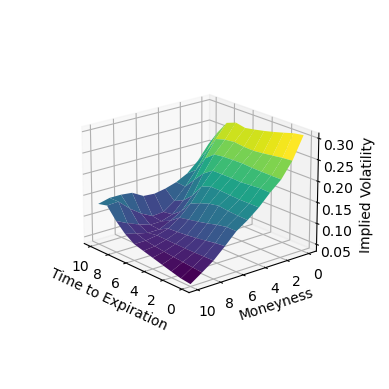

Output: 


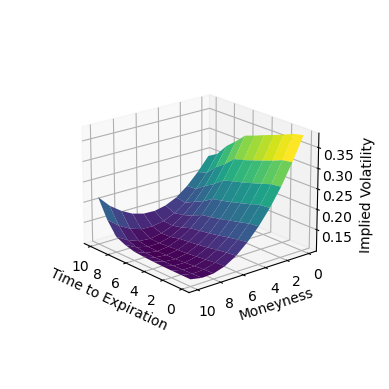

Target: 


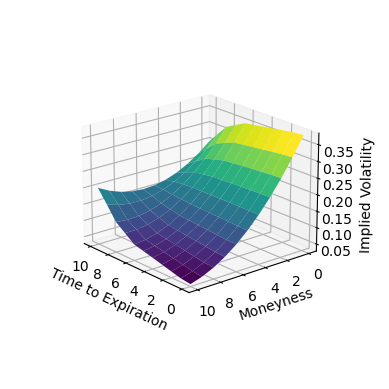

Diff: 


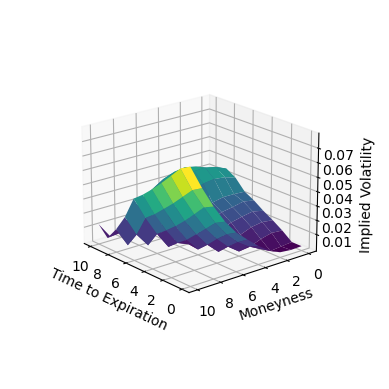

In [16]:
num = 12

fig = plt.figure(40)
ax = fig.add_subplot(111, projection='3d')

date_using = pd.DataFrame(targets[num-1].reshape(11, 11))
x, y = np.meshgrid(date_using.columns, date_using.index)
z = date_using.values

my_cmap = plt.get_cmap('viridis')
ax.plot_surface(y, x, z, cmap=my_cmap)
ax.view_init(20, 140) 
ax.set_xlabel('Time to Expiration', labelpad=7)
ax.set_ylabel('Moneyness', labelpad=6)
ax.set_zlabel('Implied Volatility', labelpad=8)
ax.set_box_aspect(aspect=None, zoom=0.7)
print('Target: ')
plt.show()

fig = plt.figure(40)
ax = fig.add_subplot(111, projection='3d')

date_using = pd.DataFrame(preds[num].reshape(11, 11))
x, y = np.meshgrid(date_using.columns, date_using.index)
z = date_using.values

my_cmap = plt.get_cmap('viridis')
ax.plot_surface(y, x, z, cmap=my_cmap)
ax.view_init(20, 140) 
ax.set_xlabel('Time to Expiration', labelpad=7)
ax.set_ylabel('Moneyness', labelpad=6)
ax.set_zlabel('Implied Volatility', labelpad=8)
ax.set_box_aspect(aspect=None, zoom=0.7)
print('Output: ')
plt.show()

fig = plt.figure(40)
ax = fig.add_subplot(111, projection='3d')

date_using = pd.DataFrame(targets[num].reshape(11, 11))
x, y = np.meshgrid(date_using.columns, date_using.index)
z = date_using.values

my_cmap = plt.get_cmap('viridis')
ax.plot_surface(y, x, z, cmap=my_cmap)
ax.view_init(20, 140) 
ax.set_xlabel('Time to Expiration', labelpad=7)
ax.set_ylabel('Moneyness', labelpad=6)
ax.set_zlabel('Implied Volatility', labelpad=8)
ax.set_box_aspect(aspect=None, zoom=0.7)
print('Target: ')
plt.show()

fig = plt.figure(40)
ax = fig.add_subplot(111, projection='3d')

date_using = abs(pd.DataFrame(targets[num].reshape(11, 11)) - preds[num].reshape(11, 11))
x, y = np.meshgrid(date_using.columns, date_using.index)
z = date_using.values

my_cmap = plt.get_cmap('viridis')
ax.plot_surface(y, x, z, cmap=my_cmap)
ax.view_init(20, 140) 
ax.set_xlabel('Time to Expiration', labelpad=7)
ax.set_ylabel('Moneyness', labelpad=6)
ax.set_zlabel('Implied Volatility', labelpad=8)
ax.set_box_aspect(aspect=None, zoom=0.7)
print('Diff: ')
plt.show()

In [3]:
import os

directory = '/scalers/'
filename = os.path.join(directory, f'{1234}.pkl')

In [4]:
filename

'/scalers/1234.pkl'

In [15]:
with open('scalers/example.pkl', 'rb') as file:
    pass

FileNotFoundError: [Errno 2] No such file or directory: 'scalers/example.pkl'